In [2]:
# Fit (linear, poly2 and poly3)
# Fe_H, (Fe_H_ERR) vs. O_FE (O_FE_ERR)
# 𝐺𝐿𝐴𝑇<−10  or 𝐺𝐿𝐴𝑇>10

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return (m*x)+b

def poly2(x,a,b,c):
    return a*(x**(2))+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**(3))) + (b*(x**(2))) + (c*x) + d 

# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [4]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

In [5]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


LINEAR: -0.191, 0.057
POLY2: -0.050, -0.243, 0.054
POLY3: 0.051, 0.055, -0.214, 0.050


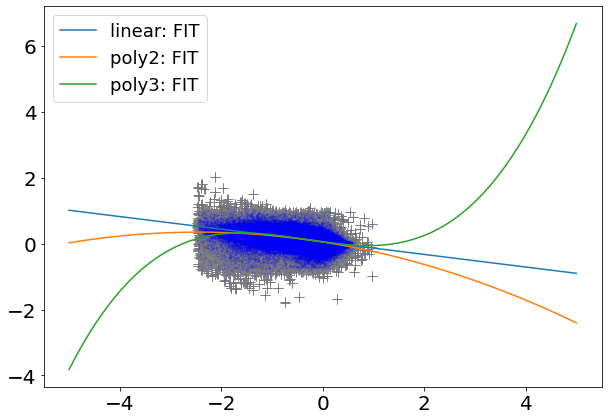

In [6]:
star = star[~np.isnan(star['Fe_H'])]
star = star[~np.isnan(star['O_FE'])]

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < 2) | (star['GLAT'] > -2)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                          star['Fe_H'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC,  = mcFit3(poly2, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                         star['Fe_H'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(poly3, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                            star['Fe_H'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['Fe_H'][cut1],star['O_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['Fe_H'][cut1]),star['O_FE'][cut1], xerr=(star['Fe_H'][cut1]/1000),
             yerr=(star['O_FE'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-5,5,200) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC, ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR: -0.191, 0.057
POLY2: -0.050, -0.243, 0.054
POLY3: 0.051, 0.055, -0.214, 0.050


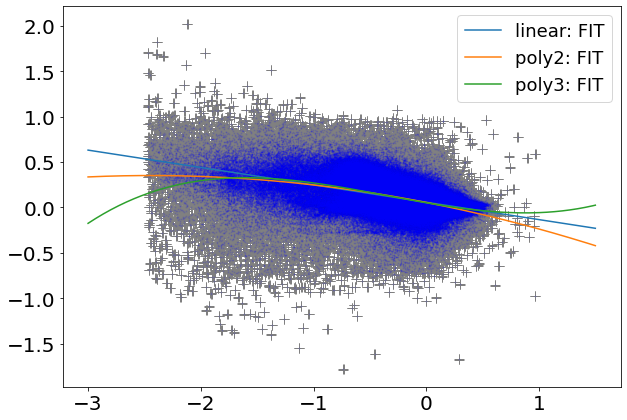

In [7]:
star = star[~np.isnan(star['Fe_H'])]
star = star[~np.isnan(star['O_FE'])]

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < 2) | (star['GLAT'] > -2)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                          star['Fe_H'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC,  = mcFit3(poly2, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                         star['Fe_H'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(poly3, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                            star['Fe_H'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['Fe_H'][cut1],star['O_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['Fe_H'][cut1]),star['O_FE'][cut1], xerr=(star['Fe_H'][cut1]/1000),
             yerr=(star['O_FE'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,200) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC, ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR: -0.195, 0.056
POLY2: -0.063, -0.266, 0.052
POLY3: 0.031, 0.006, -0.243, 0.050


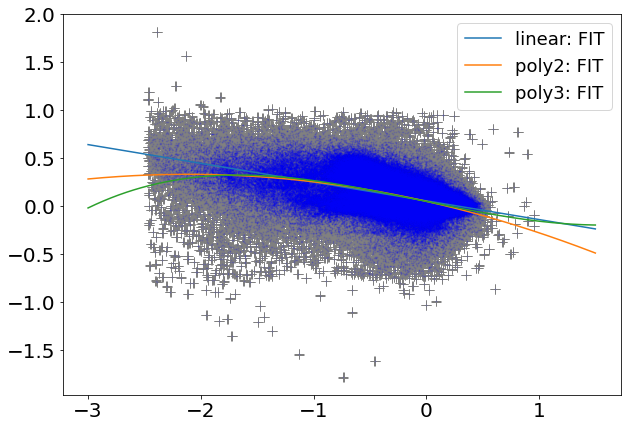

In [8]:
star = star[~np.isnan(star['Fe_H'])]
star = star[~np.isnan(star['O_FE'])]

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < -10) | (star['GLAT'] > 10)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                          star['Fe_H'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC,  = mcFit3(poly2, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                         star['Fe_H'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(poly3, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                            star['Fe_H'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['Fe_H'][cut1],star['O_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['Fe_H'][cut1]),star['O_FE'][cut1], xerr=(star['Fe_H'][cut1]/1000),
             yerr=(star['O_FE'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,200) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC, ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR: -0.132, 0.043
POLY2: -0.026, -0.148, 0.045
POLY3: 0.085, 0.125, -0.129, 0.036


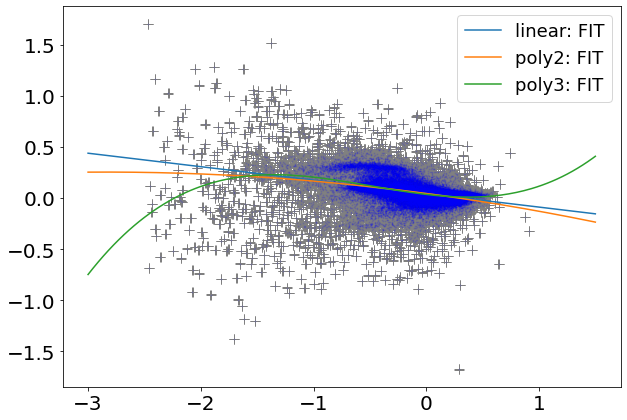

In [11]:
star = star[~np.isnan(star['Fe_H'])]
star = star[~np.isnan(star['O_FE'])]

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −2 < GLAT < 2 )
ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < 2) & (star['GLAT'] > -2)
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                          star['Fe_H'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## POLY2 FIT (3 parameter)
polyA, polyB, polyC,  = mcFit3(poly2, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                         star['Fe_H'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## COS FIT (4 parameter)
cfA, cfB, cfC, cfD = mcFit4(poly3, star['Fe_H'][cut1], star['O_FE'][cut1], star['Fe_H'][cut1]/1000, \
                            star['Fe_H'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star['Fe_H'][cut1],star['O_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['Fe_H'][cut1]),star['O_FE'][cut1], xerr=(star['Fe_H'][cut1]/1000),
             yerr=(star['O_FE'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,200) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC, ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

In [ ]:
# The best-fit values of the parameters are -3 to 1.5
# The function with the best fit is the poly 3 fit. 
# According to my fit there are outliers. 